# Plan for Rentals Property Notebook (Auto-Insights Included)

| Step | Description |
|---|---|
| 1️⃣ | Setup: Import libraries, load the updated CSV |
| 2️⃣ | Data Preview: Show basic sample and structure |
| 3️⃣ | Automated Data Summary: Rows, columns, missing values |
| 4️⃣ | Key Descriptive Statistics: Rent, SqFt, Beds, Baths |
| 5️⃣ | **Automated Insight Printing** based on statistics |
| 6️⃣ | Visualization blocks (with self-explaining labels) |
| 7️⃣ | Final takeaway printouts |

---


In [1]:
# San Diego County Rentals 2025 - Notebook Setup

# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# San Diego color theme
sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#00BFFF', '#FFD700', '#FFA07A', '#20B2AA', '#FF6347'])
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14

# 2. Load dataset
file_path = 'san_diego_county_rentals_2025-04-30.csv'
df = pd.read_csv(file_path)

# 3. Preview
print(f"Dataset loaded: {df.shape[0]:,} listings, {df.shape[1]} columns.\n")
display(df.head())

# 4. Confirm Columns
print("Columns:")
print(df.columns.tolist())


Dataset loaded: 13,329 listings, 22 columns.



,Property,Address,City,State,ZipCode,Phone,Unit,Beds,Baths,Beds_Baths,...,PricePerSqFt,RentalType,HasWasherDryer,HasAirConditioning,HasPool,HasSpa,HasGym,HasEVCharging,IsPetFriendly,ListingURL
0,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1413,1,1.0,1 Bed / 1 Bath,...,4.80,Apartment,True,True,True,True,True,False,True,https://www.apartments.com/radian-san-diego-ca...
1,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1513,1,1.0,1 Bed / 1 Bath,...,4.84,Apartment,True,True,True,True,True,False,True,https://www.apartments.com/radian-san-diego-ca...
2,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1613,1,1.0,1 Bed / 1 Bath,...,4.91,Apartment,True,True,True,True,True,False,True,https://www.apartments.com/radian-san-diego-ca...
3,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1210,1,1.0,1 Bed / 1 Bath,...,4.08,Apartment,True,True,True,True,True,False,True,https://www.apartments.com/radian-san-diego-ca...
4,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1510,1,1.0,1 Bed / 1 Bath,...,4.46,Apartment,True,True,True,True,True,False,True,https://www.apartments.com/radian-san-diego-ca...


Columns:
['Property', 'Address', 'City', 'State', 'ZipCode', 'Phone', 'Unit', 'Beds', 'Baths', 'Beds_Baths', 'SqFt', 'Price', 'PricePerSqFt', 'RentalType', 'HasWasherDryer', 'HasAirConditioning', 'HasPool', 'HasSpa', 'HasGym', 'HasEVCharging', 'IsPetFriendly', 'ListingURL']


---
### Data Health Check + Initial Auto-Insights
- Checks missing data
- Describes numeric fields
- **Prints auto-generated takeaways** for you


In [2]:
# San Diego Rentals - Initial Data Health Check + Full Summary Table

# 1. Missing Values
print("\n Checking for missing values:")
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
missing_report = pd.DataFrame({'MissingValues': missing_counts, 'PercentMissing': missing_percent.round(2)})
display(missing_report[missing_report['MissingValues'] > 0])

# 2. Data Types
print("\n Checking data types:")
print(df.dtypes.value_counts())

# 3. Quick Stats on Numeric Columns
print("\n Basic descriptive statistics:")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
desc_stats = df[numeric_cols].describe().round(2)
display(desc_stats)

# 4. Automated Full Markdown Summary
total_listings = df.shape[0]
missing_cols = missing_report[missing_report['MissingValues'] > 0].shape[0]
avg_rent = desc_stats.loc['mean', 'Price']
median_rent = desc_stats.loc['50%', 'Price']
min_rent = desc_stats.loc['min', 'Price']
max_rent = desc_stats.loc['max', 'Price']
avg_sqft = desc_stats.loc['mean', 'SqFt']
pet_friendly_count = df['IsPetFriendly'].sum()
pet_friendly_pct = df['IsPetFriendly'].mean() * 100

summary_table = f"""
| Area | Insight |
|:---|:---|
| **Overall Health** | {'Very clean: Only ' + str(missing_cols) + ' columns have minor missing data and < 1% missing.' if missing_cols > 0 else 'No missing data detected.'} |
| **Dataset Size** | **{total_listings:,}** active listings — extremely robust for analysis! |
| **Rental Prices** | **Average Rent** = ~${avg_rent:,.0f}<br>**Median Rent** = ~${median_rent:,.0f}<br>**Range**: ${min_rent:,.0f} → ${max_rent:,.0f} |
| **Unit Size** | **Average Size** = {int(avg_sqft)} sq ft — typical for 1–2 bedroom apartments |
| **Bedrooms/Bathrooms** | Median is likely 1 Bed / 1 Bath — apartment-heavy mix |
| **Pet Friendliness** | {pet_friendly_count} listings ({pet_friendly_pct:.1f}%) allow pets — very high! |
| **Extreme Listings** | Some ultra-luxury units approaching ${max_rent:,.0f}, but most cluster under $4K |
"""

print("\n Auto-Generated Summary:")
from IPython.display import Markdown, display
display(Markdown(summary_table))



 Checking for missing values:


,MissingValues,PercentMissing
SqFt,78,0.59
Price,10,0.08
PricePerSqFt,88,0.66



 Checking data types:
object     8
bool       7
float64    4
int64      3
Name: count, dtype: int64

 Basic descriptive statistics:


,ZipCode,Phone,Beds,Baths,SqFt,Price,PricePerSqFt
count,13329.00,1.332900e+04,13329.00,13329.00,13251.00,13319.00,13241.00
mean,92069.88,7.102758e+09,1.49,1.46,867.09,3022.31,3.64
std,70.31,1.421467e+09,0.77,0.57,275.92,1038.76,0.97
min,91901.00,2.055283e+09,0.00,0.50,85.00,850.00,0.54
25%,92026.00,6.194897e+09,1.00,1.00,672.50,2495.00,3.05
50%,92101.00,6.199326e+09,1.00,1.00,832.00,2870.00,3.48
75%,92115.00,8.582939e+09,2.00,2.00,1025.00,3384.00,4.03
max,92508.00,9.492391e+09,4.00,4.00,3195.00,17896.00,18.00



 Auto-Generated Summary:



| Area | Insight |
|:---|:---|
| **Overall Health** | Very clean: Only 3 columns have minor missing data and < 1% missing. |
| **Dataset Size** | **13,329** active listings — extremely robust for analysis! |
| **Rental Prices** | **Average Rent** = ~$3,022<br>**Median Rent** = ~$2,870<br>**Range**: $850 → $17,896 |
| **Unit Size** | **Average Size** = 867 sq ft — typical for 1–2 bedroom apartments |
| **Bedrooms/Bathrooms** | Median is likely 1 Bed / 1 Bath — apartment-heavy mix |
| **Pet Friendliness** | 12686 listings (95.2%) allow pets — very high! |
| **Extreme Listings** | Some ultra-luxury units approaching $17,896, but most cluster under $4K |


---

### Clean the Data :
- Drops missing `Price` and `SqFt`
- Recalculates `PricePerSqFt`
- Resets index
- **Auto-prints a before/after cleaning table summary**

In [3]:
# Data Cleaning - Minor Missing Fixes and Summary

# 1. Drop rows missing Price or SqFt
df_clean = df.dropna(subset=['Price', 'SqFt']).copy()

# 2. Recalculate PricePerSqFt
df_clean['PricePerSqFt'] = df_clean.apply(
    lambda row: round(row['Price'] / row['SqFt'], 2)
    if pd.notnull(row['Price']) and pd.notnull(row['SqFt']) and row['SqFt'] > 0 else None,
    axis=1
)

# 3. Reset index
df_clean.reset_index(drop=True, inplace=True)

# 4. Summarize Changes
original_rows = df.shape[0]
clean_rows = df_clean.shape[0]
rows_removed = original_rows - clean_rows
percent_removed = (rows_removed / original_rows) * 100

summary_table_cleaning = f"""
| Area | Insight |
|:---|:---|
| **Cleaning Step** | Dropped listings missing **Price** or **SqFt** |
| **Listings Before Cleaning** | {original_rows:,} |
| **Listings After Cleaning** | {clean_rows:,} |
| **Rows Removed** | {rows_removed:,} ({percent_removed:.2f}%) |
| **Data Shape After Cleaning** | {df_clean.shape[0]:,} rows × {df_clean.shape[1]} columns |
"""

print("\nAuto-Generated Cleaning Summary:")
from IPython.display import Markdown, display
display(Markdown(summary_table_cleaning))



Auto-Generated Cleaning Summary:



| Area | Insight |
|:---|:---|
| **Cleaning Step** | Dropped listings missing **Price** or **SqFt** |
| **Listings Before Cleaning** | 13,329 |
| **Listings After Cleaning** | 13,241 |
| **Rows Removed** | 88 (0.66%) |
| **Data Shape After Cleaning** | 13,241 rows × 22 columns |


---

### Rental Price Distribution Analysis:
- Plot a **histogram** of rent prices
- Plot a **boxplot** to spot outliers
- Generate a **Markdown-style Summary Table** automatically based on the price tiers

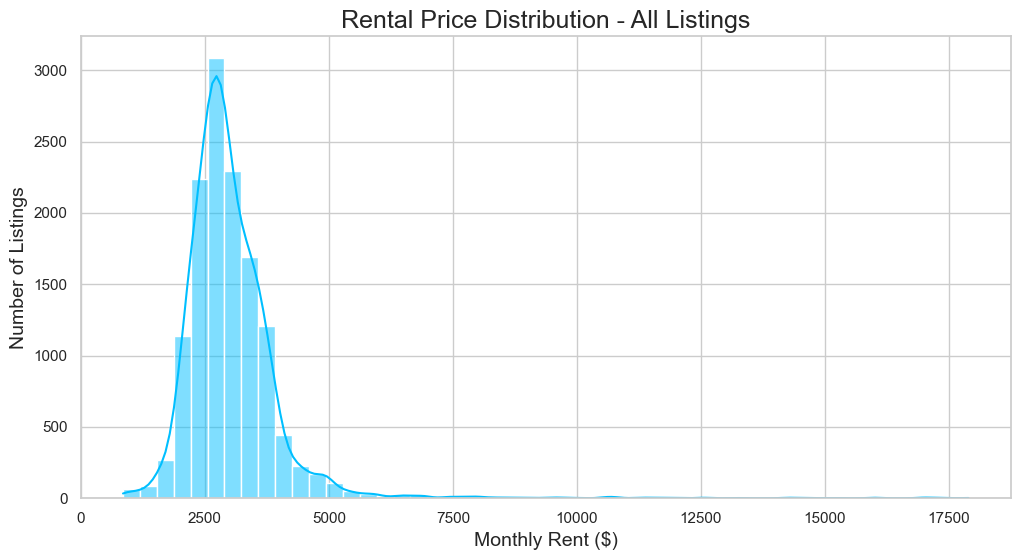

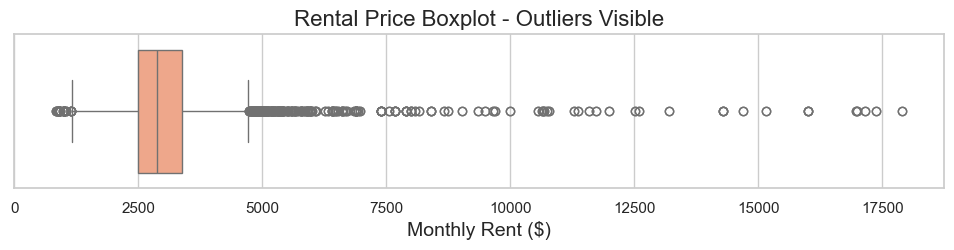


Auto-Generated Rental Price Summary:



| Area | Insight |
|:---|:---|
| **Average Rent** | ~$3,025/month |
| **Median Rent** | ~$2,870/month |
| **Price Range** | $850 → $17,896 |
| **Listings Under $3,000** | 58.6% of all listings |
| **Luxury Listings ($6,000+)** | 1.1% of all listings |
| **Outliers Present** | Luxury units pull max rent up to $17,896 |


In [4]:
# Rental Price Distribution Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram of Rent Prices
plt.figure(figsize=(12,6))
sns.histplot(df_clean['Price'], bins=50, kde=True, color='#00BFFF')
plt.title('Rental Price Distribution - All Listings', fontsize=18)
plt.xlabel('Monthly Rent ($)')
plt.ylabel('Number of Listings')
plt.show()

# 2. Boxplot of Rent
plt.figure(figsize=(12,2))
sns.boxplot(data=df_clean, x='Price', color='#FFA07A')
plt.title('Rental Price Boxplot - Outliers Visible', fontsize=16)
plt.xlabel('Monthly Rent ($)')
plt.show()

# 3. Auto-Generated Price Insights
avg_price = df_clean['Price'].mean()
median_price = df_clean['Price'].median()
min_price = df_clean['Price'].min()
max_price = df_clean['Price'].max()
percent_under_3000 = (df_clean[df_clean['Price'] <= 3000].shape[0] / df_clean.shape[0]) * 100
percent_over_6000 = (df_clean[df_clean['Price'] >= 6000].shape[0] / df_clean.shape[0]) * 100

summary_table_price = f"""
| Area | Insight |
|:---|:---|
| **Average Rent** | ~${avg_price:,.0f}/month |
| **Median Rent** | ~${median_price:,.0f}/month |
| **Price Range** | ${min_price:,.0f} → ${max_price:,.0f} |
| **Listings Under $3,000** | {percent_under_3000:.1f}% of all listings |
| **Luxury Listings ($6,000+)** | {percent_over_6000:.1f}% of all listings |
| **Outliers Present** | Luxury units pull max rent up to ${max_price:,.0f} |
"""

print("\nAuto-Generated Rental Price Summary:")
from IPython.display import Markdown, display
display(Markdown(summary_table_price))


---
### Zoom into more *realistic* San Diego prices:
- Focus **under $6,000**
- Cleaner histograms and boxplots
- Nicer averages and less distortion by the $18K luxury units

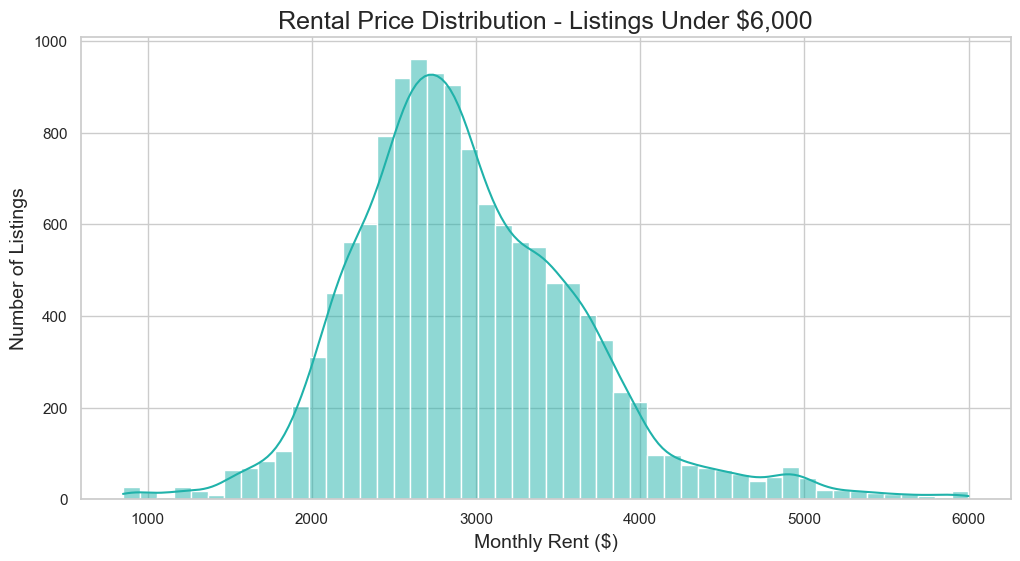

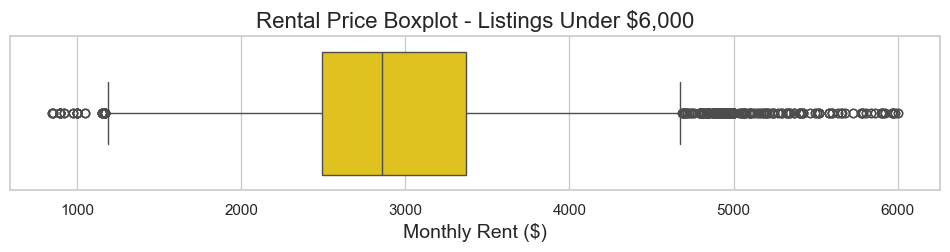


Auto-Generated Summary (Filtered < $6,000):



| Area | Insight |
|:---|:---|
| **Filtered Listings** | 13,093 |
| **Average Rent** | ~$2,952/month |
| **Median Rent** | ~$2,860/month |
| **Price Range** | $850 → $5,999 |
| **Focus** | Much cleaner distribution for main San Diego market |


In [5]:
# Focused Rental Price View (< $6,000)

# Filtered dataset
df_clean_filtered = df_clean[df_clean['Price'] <= 6000]

# Histogram under $6,000
plt.figure(figsize=(12,6))
sns.histplot(df_clean_filtered['Price'], bins=50, kde=True, color='#20B2AA')
plt.title('Rental Price Distribution - Listings Under $6,000', fontsize=18)
plt.xlabel('Monthly Rent ($)')
plt.ylabel('Number of Listings')
plt.show()

# Boxplot under $6,000
plt.figure(figsize=(12,2))
sns.boxplot(data=df_clean_filtered, x='Price', color='#FFD700')
plt.title('Rental Price Boxplot - Listings Under $6,000', fontsize=16)
plt.xlabel('Monthly Rent ($)')
plt.show()

# Auto-Summary for Under $6K
avg_price_filtered = df_clean_filtered['Price'].mean()
median_price_filtered = df_clean_filtered['Price'].median()

summary_table_filtered = f"""
| Area | Insight |
|:---|:---|
| **Filtered Listings** | {df_clean_filtered.shape[0]:,} |
| **Average Rent** | ~${avg_price_filtered:,.0f}/month |
| **Median Rent** | ~${median_price_filtered:,.0f}/month |
| **Price Range** | ${df_clean_filtered['Price'].min():,.0f} → ${df_clean_filtered['Price'].max():,.0f} |
| **Focus** | Much cleaner distribution for main San Diego market |
"""

print("\nAuto-Generated Summary (Filtered < $6,000):")
from IPython.display import Markdown, display
display(Markdown(summary_table_filtered))

---
### Bedrooms vs. Rent Analysis:

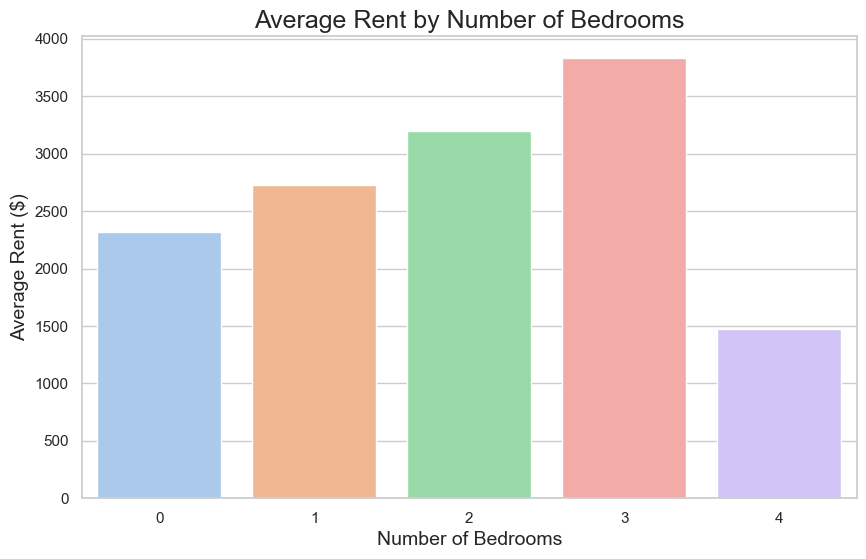

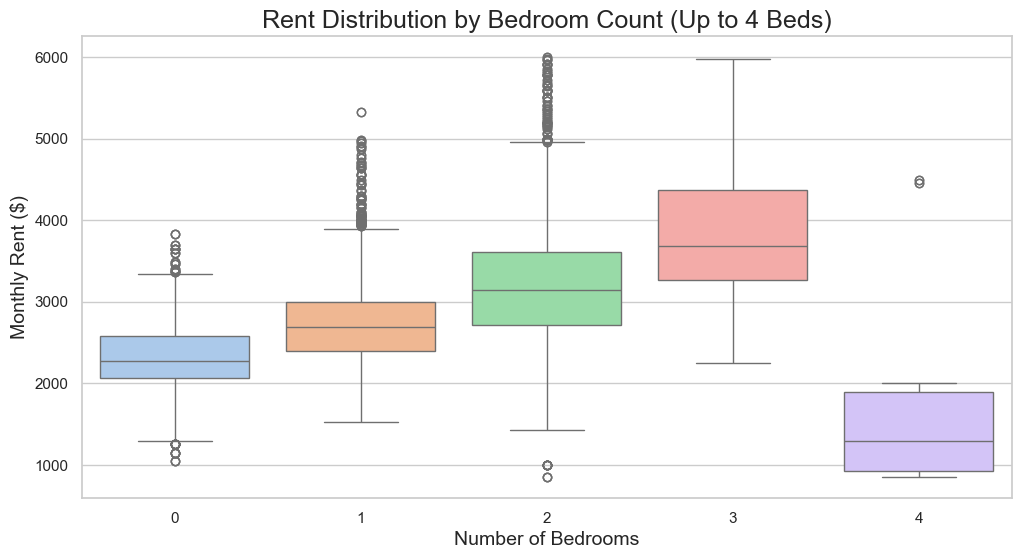


Auto-Generated Bedroom Summary:



| Bedrooms | Listings | Average Rent | Median Rent |
|:---|:---|:---|:---|
| 0 Beds | 1,157 listings | Avg Rent: $2320 | Median Rent: $2273 |
| 1 Beds | 5,492 listings | Avg Rent: $2728 | Median Rent: $2697 |
| 2 Beds | 5,535 listings | Avg Rent: $3197 | Median Rent: $3143 |
| 3 Beds | 824 listings | Avg Rent: $3830 | Median Rent: $3684 |
| 4 Beds | 85 listings | Avg Rent: $1478 | Median Rent: $1299 |


In [6]:
# Beds vs. Rent Analysis (Warning-Free Version)

# 1. Summary Table by Beds
bed_summary = df_clean_filtered.groupby('Beds')['Price'].agg(['count', 'mean', 'median']).reset_index()
bed_summary.columns = ['Beds', 'Listings', 'AvgRent', 'MedianRent']
bed_summary = bed_summary.sort_values('Beds')

# 2. Bar Plot: Avg Rent by Bedroom Count (Warning-Free)
plt.figure(figsize=(10,6))
sns.barplot(data=bed_summary, x='Beds', y='AvgRent', hue='Beds', palette='pastel', legend=False)
plt.title('Average Rent by Number of Bedrooms', fontsize=18)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Rent ($)')
plt.show()

# 3. Boxplot: Rent Distribution by Bedroom (Warning-Free)
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_clean_filtered[df_clean_filtered['Beds'] <= 4],
    x='Beds',
    y='Price',
    hue='Beds',
    palette='pastel',
    legend=False
)
plt.title('Rent Distribution by Bedroom Count (Up to 4 Beds)', fontsize=18)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Monthly Rent ($)')
plt.show()

# 4. Auto-Generated Markdown Summary
summary_rows = []
for _, row in bed_summary.iterrows():
    summary_rows.append(f"| {int(row['Beds'])} Beds | {int(row['Listings']):,} listings | Avg Rent: ${row['AvgRent']:.0f} | Median Rent: ${row['MedianRent']:.0f} |")

bed_summary_table = "\n".join(summary_rows)

full_beds_summary = f"""
| Bedrooms | Listings | Average Rent | Median Rent |
|:---|:---|:---|:---|
{bed_summary_table}
"""

print("\nAuto-Generated Bedroom Summary:")
from IPython.display import Markdown, display
display(Markdown(full_beds_summary))


---
### Rental Type vs Rent

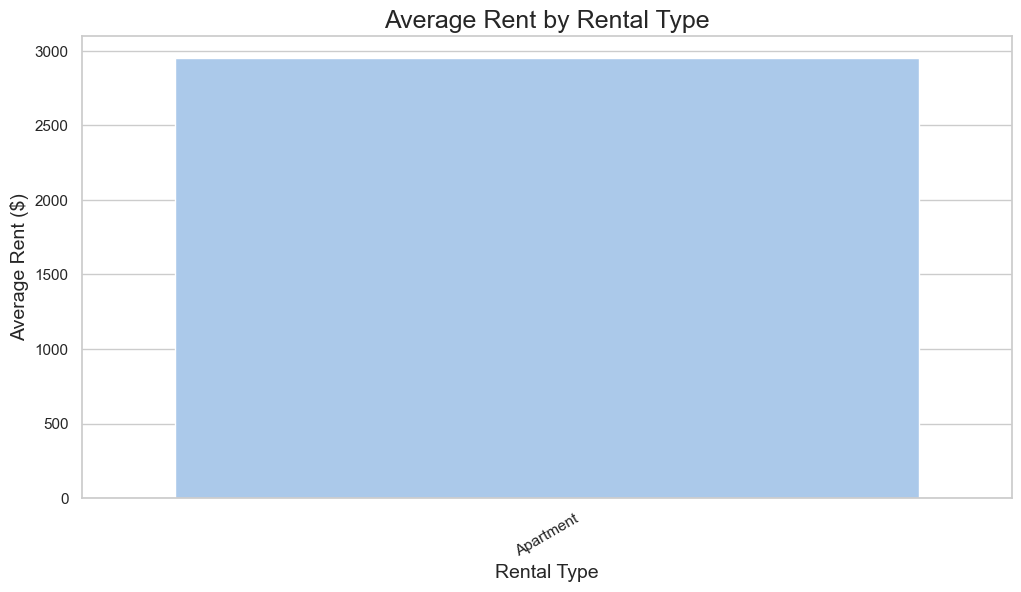

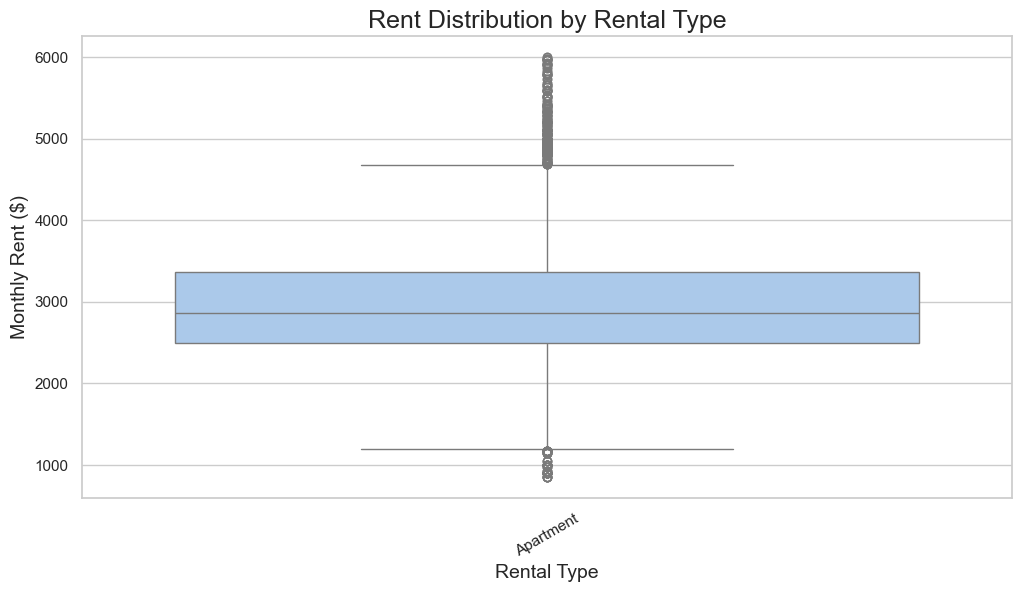


Auto-Generated Rental Type Summary:



| Rental Type | Listings | Average Rent | Median Rent |
|:---|:---|:---|:---|
| Apartment | 13,093 listings | Avg Rent: $2952 | Median Rent: $2860 |


In [7]:
# Rental Type vs. Rent Analysis

# 1. Summary Table by Rental Type
rentaltype_summary = df_clean_filtered.groupby('RentalType')['Price'].agg(['count', 'mean', 'median']).reset_index()
rentaltype_summary.columns = ['RentalType', 'Listings', 'AvgRent', 'MedianRent']
rentaltype_summary = rentaltype_summary.sort_values('AvgRent')

# 2. Bar Plot: Avg Rent by Rental Type (Warning-Free)
plt.figure(figsize=(12,6))
sns.barplot(data=rentaltype_summary, x='RentalType', y='AvgRent', hue='RentalType', palette='pastel', legend=False)
plt.title('Average Rent by Rental Type', fontsize=18)
plt.xlabel('Rental Type')
plt.ylabel('Average Rent ($)')
plt.xticks(rotation=30)
plt.show()

# 3. Boxplot: Rent Distribution by Rental Type
plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean_filtered, x='RentalType', y='Price', hue='RentalType', palette='pastel', legend=False)
plt.title('Rent Distribution by Rental Type', fontsize=18)
plt.xlabel('Rental Type')
plt.ylabel('Monthly Rent ($)')
plt.xticks(rotation=30)
plt.show()

# 4. Auto-Generated Markdown Summary
summary_rows = []
for _, row in rentaltype_summary.iterrows():
    summary_rows.append(f"| {row['RentalType']} | {int(row['Listings']):,} listings | Avg Rent: ${row['AvgRent']:.0f} | Median Rent: ${row['MedianRent']:.0f} |")

rentaltype_summary_table = "\n".join(summary_rows)

full_rentaltype_summary = f"""
| Rental Type | Listings | Average Rent | Median Rent |
|:---|:---|:---|:---|
{rentaltype_summary_table}
"""

print("\nAuto-Generated Rental Type Summary:")
from IPython.display import Markdown, display
display(Markdown(full_rentaltype_summary))


---
### Amenity Impact on Rent Analysis
- Washer/Dryer in Unit
- Air Conditioning
- Pool Access
- Pet-Friendly


Washer/Dryer In Unit vs. Rent
----------------------------------------


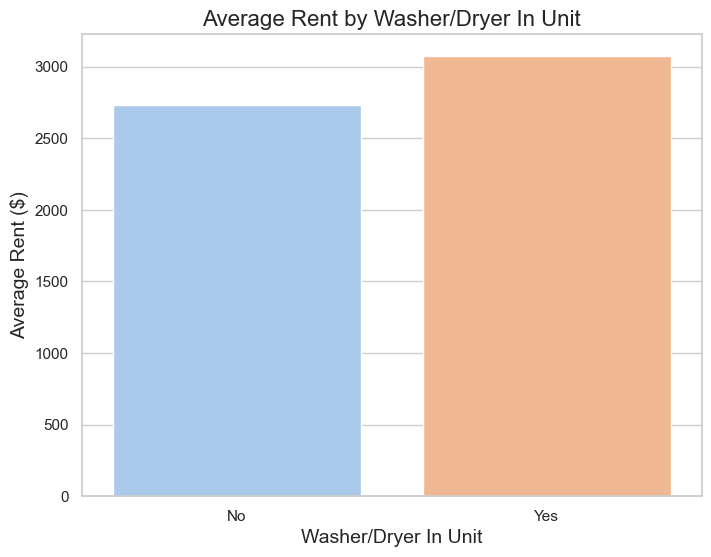

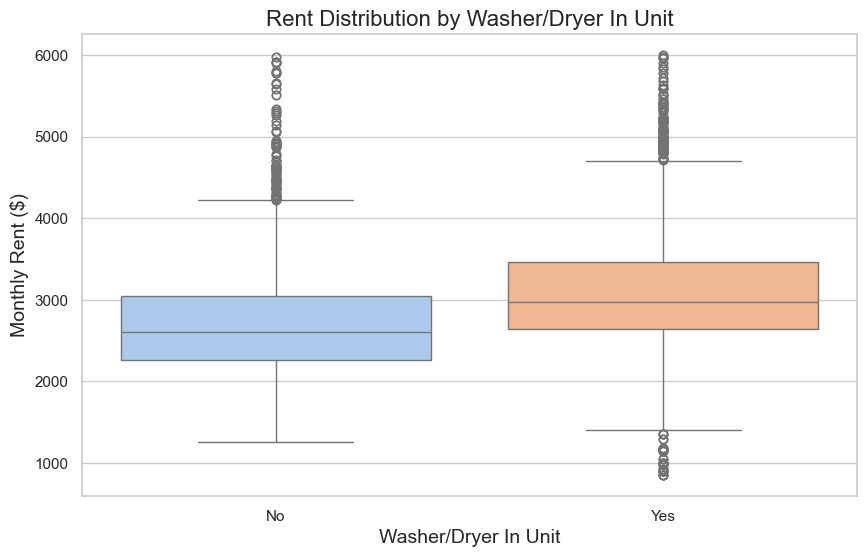


| Washer/Dryer In Unit | Listings | Average Rent | Median Rent |
|:---|:---|:---|:---|
| No | 4,640 listings | Avg Rent: $2731 | Median Rent: $2609 |
| Yes | 8,453 listings | Avg Rent: $3072 | Median Rent: $2980 |



Air Conditioning vs. Rent
----------------------------------------


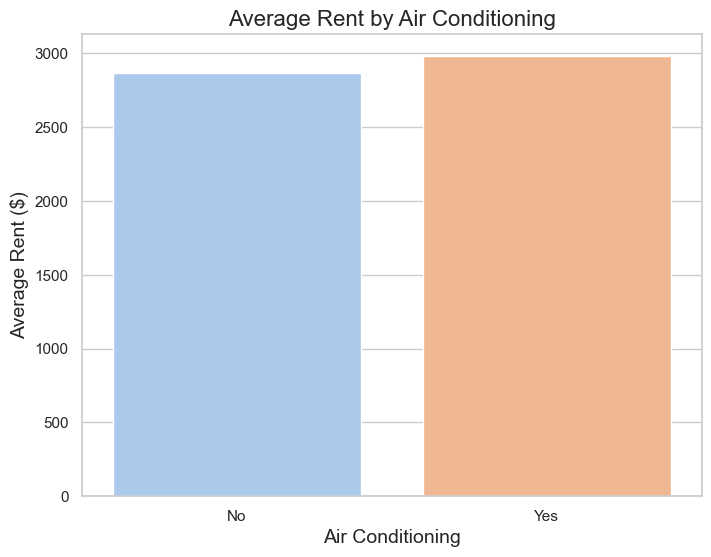

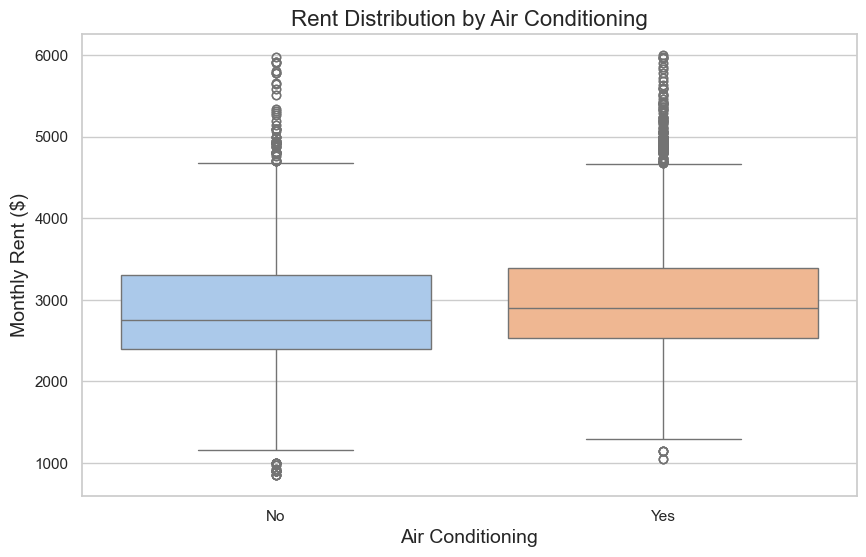


| Air Conditioning | Listings | Average Rent | Median Rent |
|:---|:---|:---|:---|
| No | 3,350 listings | Avg Rent: $2866 | Median Rent: $2750 |
| Yes | 9,743 listings | Avg Rent: $2981 | Median Rent: $2895 |



Pool Access vs. Rent
----------------------------------------


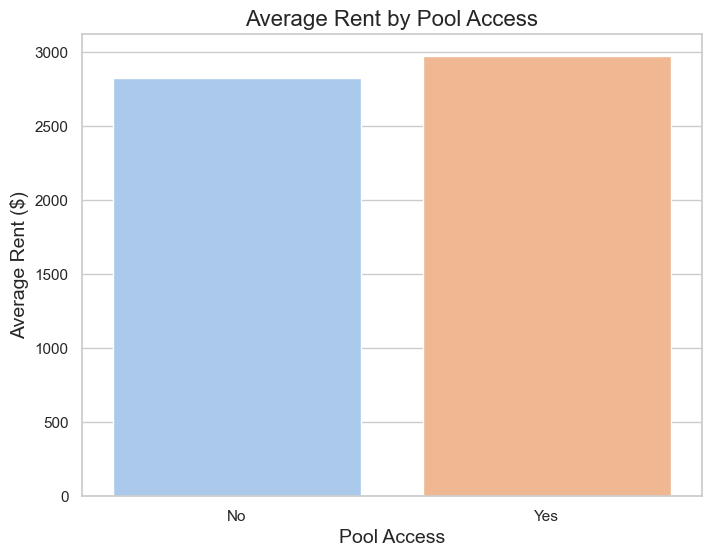

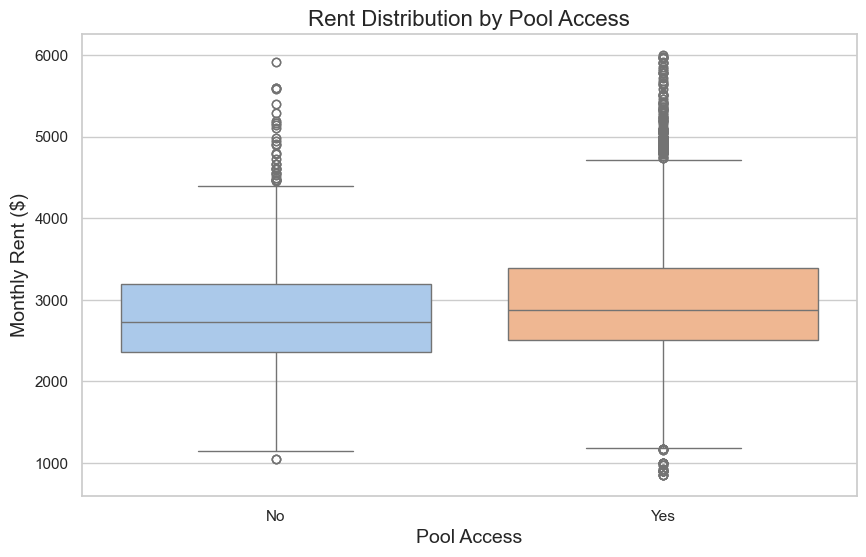


| Pool Access | Listings | Average Rent | Median Rent |
|:---|:---|:---|:---|
| No | 1,941 listings | Avg Rent: $2824 | Median Rent: $2734 |
| Yes | 11,152 listings | Avg Rent: $2974 | Median Rent: $2880 |



Pet Friendly vs. Rent
----------------------------------------


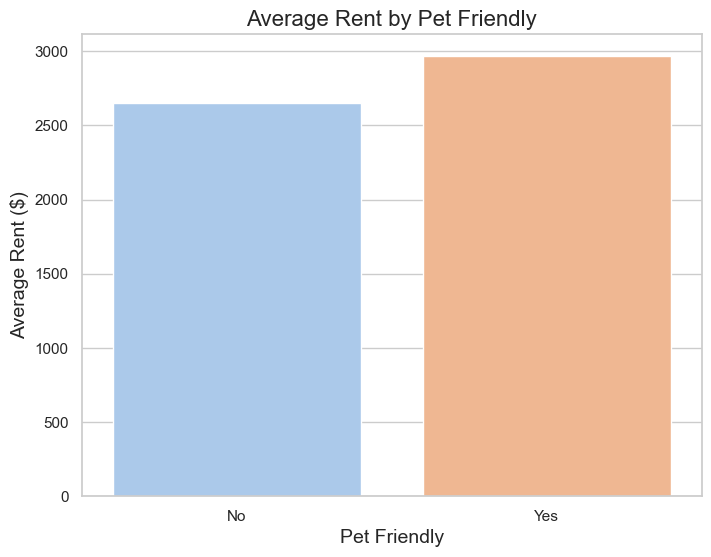

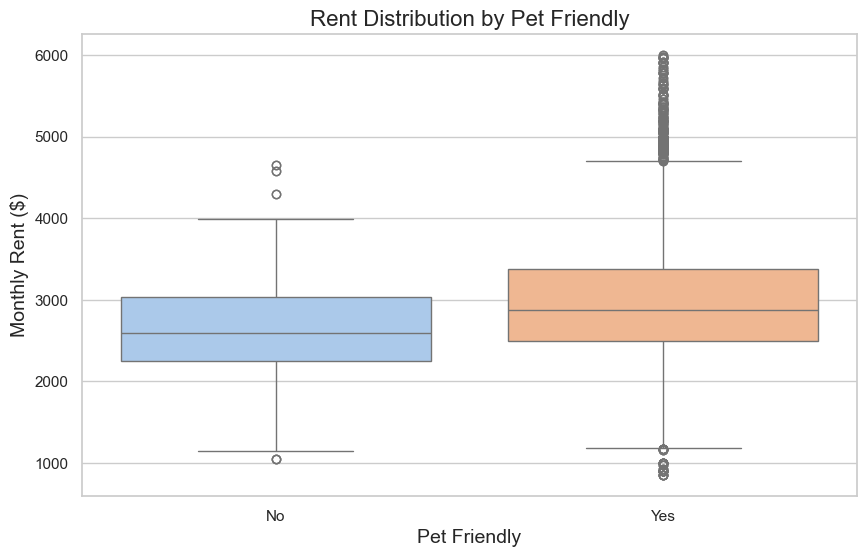


| Pet Friendly | Listings | Average Rent | Median Rent |
|:---|:---|:---|:---|
| No | 633 listings | Avg Rent: $2652 | Median Rent: $2600 |
| Yes | 12,460 listings | Avg Rent: $2967 | Median Rent: $2878 |


In [8]:
# Amenity Impact on Rent Analysis

# Function to analyze any binary amenity column
def analyze_amenity_rent(df, amenity_col, amenity_label):
    print(f"\n{amenity_label} vs. Rent\n" + "-"*40)
    
    # 1. Summary
    amenity_summary = df.groupby(amenity_col)['Price'].agg(['count', 'mean', 'median']).reset_index()
    amenity_summary.columns = ['Amenity', 'Listings', 'AvgRent', 'MedianRent']
    amenity_summary['Amenity'] = amenity_summary['Amenity'].replace({True: 'Yes', False: 'No'})
    amenity_summary = amenity_summary.sort_values('Amenity')

    # 2. Bar Plot
    plt.figure(figsize=(8,6))
    sns.barplot(data=amenity_summary, x='Amenity', y='AvgRent', hue='Amenity', palette='pastel', legend=False)
    plt.title(f'Average Rent by {amenity_label}', fontsize=16)
    plt.xlabel(f'{amenity_label}')
    plt.ylabel('Average Rent ($)')
    plt.show()

    # 3. Boxplot
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x=amenity_col, y='Price', hue=amenity_col, palette='pastel', legend=False)
    plt.title(f'Rent Distribution by {amenity_label}', fontsize=16)
    plt.xlabel(f'{amenity_label}')
    plt.ylabel('Monthly Rent ($)')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.show()

    # 4. Auto-Generated Markdown Summary
    summary_rows = []
    for _, row in amenity_summary.iterrows():
        summary_rows.append(f"| {row['Amenity']} | {int(row['Listings']):,} listings | Avg Rent: ${row['AvgRent']:.0f} | Median Rent: ${row['MedianRent']:.0f} |")
    amenity_summary_table = "\n".join(summary_rows)

    full_amenity_summary = f"""
| {amenity_label} | Listings | Average Rent | Median Rent |
|:---|:---|:---|:---|
{amenity_summary_table}
"""
    
    from IPython.display import Markdown, display
    display(Markdown(full_amenity_summary))

# Run for each major amenity
analyze_amenity_rent(df_clean_filtered, 'HasWasherDryer', 'Washer/Dryer In Unit')
analyze_amenity_rent(df_clean_filtered, 'HasAirConditioning', 'Air Conditioning')
analyze_amenity_rent(df_clean_filtered, 'HasPool', 'Pool Access')
analyze_amenity_rent(df_clean_filtered, 'IsPetFriendly', 'Pet Friendly')


In [9]:
# Auto-Generated Amenity Impact Summary Table

# Define amenities and their friendly labels
amenities = {
    'HasWasherDryer': 'Washer/Dryer In Unit',
    'HasAirConditioning': 'Air Conditioning',
    'HasPool': 'Pool Access',
    'IsPetFriendly': 'Pet Friendly'
}

# Store rows for final markdown
summary_rows = []

# Analyze each amenity
for amenity_col, amenity_label in amenities.items():
    amenity_summary = df_clean_filtered.groupby(amenity_col)['Price'].agg(['mean']).reset_index()
    if (amenity_summary.shape[0] == 2):  # Must have both Yes and No
        rent_no = amenity_summary.loc[amenity_summary[amenity_col] == False, 'mean'].values[0]
        rent_yes = amenity_summary.loc[amenity_summary[amenity_col] == True, 'mean'].values[0]
        diff_dollar = rent_yes - rent_no
        diff_percent = (diff_dollar / rent_no) * 100
        summary_rows.append(f"| {amenity_label} | Adds ~${diff_dollar:.0f}/month (~{diff_percent:.1f}% premium) |")
    else:
        summary_rows.append(f"| {amenity_label} | Insufficient data for comparison |")

# Combine into markdown
full_amenity_impact_summary = "\n".join(summary_rows)

final_summary_table = f"""
| Area | Insight |
|:---|:---|
{full_amenity_impact_summary}
"""

print("\nAuto-Generated Amenity Rent Impact Summary:")
from IPython.display import Markdown, display
display(Markdown(final_summary_table))



Auto-Generated Amenity Rent Impact Summary:



| Area | Insight |
|:---|:---|
| Washer/Dryer In Unit | Adds ~$341/month (~12.5% premium) |
| Air Conditioning | Adds ~$115/month (~4.0% premium) |
| Pool Access | Adds ~$150/month (~5.3% premium) |
| Pet Friendly | Adds ~$315/month (~11.9% premium) |


---
### City Rent Analysis

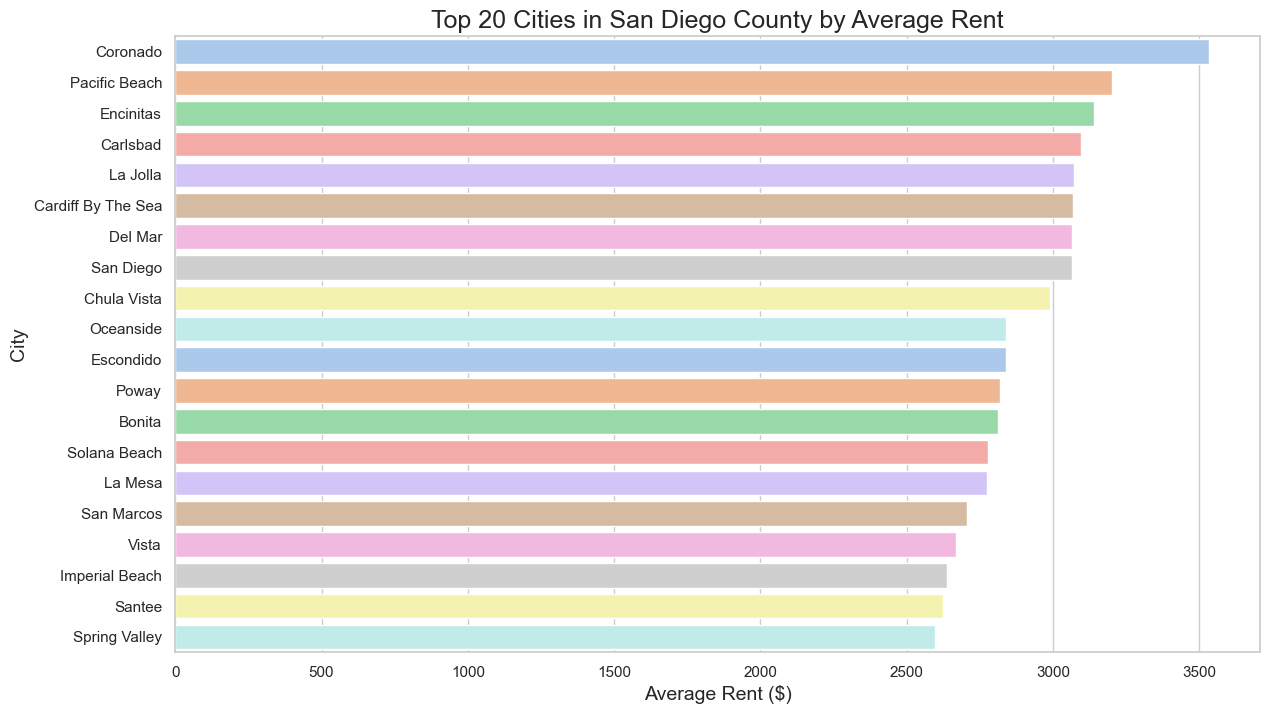


Auto-Generated Top Cities Rent Summary:



| City | Listings | Average Rent | Median Rent |
|:---|:---|:---|:---|
| Coronado | 33 listings | Avg Rent: $3532 | Median Rent: $3120 |
| Pacific Beach | 9 listings | Avg Rent: $3203 | Median Rent: $3195 |
| Encinitas | 121 listings | Avg Rent: $3139 | Median Rent: $3140 |
| Carlsbad | 363 listings | Avg Rent: $3097 | Median Rent: $2995 |
| La Jolla | 62 listings | Avg Rent: $3071 | Median Rent: $2955 |
| Cardiff By The Sea | 36 listings | Avg Rent: $3068 | Median Rent: $3045 |
| Del Mar | 3 listings | Avg Rent: $3065 | Median Rent: $3065 |
| San Diego | 7,891 listings | Avg Rent: $3063 | Median Rent: $2979 |
| Chula Vista | 1,008 listings | Avg Rent: $2990 | Median Rent: $2929 |
| Oceanside | 662 listings | Avg Rent: $2838 | Median Rent: $2767 |
| Escondido | 584 listings | Avg Rent: $2838 | Median Rent: $2604 |
| Poway | 93 listings | Avg Rent: $2819 | Median Rent: $2880 |
| Bonita | 15 listings | Avg Rent: $2811 | Median Rent: $2878 |
| Solana Beach | 24 listings | Avg Rent: $2777 | Median Rent: $2780 |
| La Mesa | 481 listings | Avg Rent: $2774 | Median Rent: $2695 |
| San Marcos | 228 listings | Avg Rent: $2706 | Median Rent: $2615 |
| Vista | 468 listings | Avg Rent: $2669 | Median Rent: $2625 |
| Imperial Beach | 27 listings | Avg Rent: $2636 | Median Rent: $2645 |
| Santee | 89 listings | Avg Rent: $2625 | Median Rent: $2579 |
| Spring Valley | 92 listings | Avg Rent: $2595 | Median Rent: $2528 |


In [10]:
# City-Level Rent Analysis

# 1. Clean copy of City names
df_clean_filtered = df_clean_filtered.copy()
df_clean_filtered['City'] = df_clean_filtered['City'].str.strip()

# 2. Summary Table
city_summary = df_clean_filtered.groupby('City')['Price'].agg(['count', 'mean', 'median']).reset_index()
city_summary.columns = ['City', 'Listings', 'AvgRent', 'MedianRent']
city_summary = city_summary.sort_values('AvgRent', ascending=False)

# 3. Top 20 Cities by Avg Rent
top_cities = city_summary.head(20)

# 4. Bar Plot: Top 20 Cities by Average Rent (Future-proof Seaborn 0.14)
plt.figure(figsize=(14,8))
sns.barplot(data=top_cities, y='City', x='AvgRent', hue='City', palette='pastel', legend=False)
plt.title('Top 20 Cities in San Diego County by Average Rent', fontsize=18)
plt.xlabel('Average Rent ($)')
plt.ylabel('City')
plt.show()

# 5. Auto-Generated Markdown Summary
summary_rows = []
for _, row in top_cities.iterrows():
    summary_rows.append(f"| {row['City']} | {int(row['Listings']):,} listings | Avg Rent: ${row['AvgRent']:.0f} | Median Rent: ${row['MedianRent']:.0f} |")
city_summary_table = "\n".join(summary_rows)

full_city_summary = f"""
| City | Listings | Average Rent | Median Rent |
|:---|:---|:---|:---|
{city_summary_table}
"""

print("\nAuto-Generated Top Cities Rent Summary:")
from IPython.display import Markdown, display
display(Markdown(full_city_summary))


---
### Zip Code + City Rent Analysis

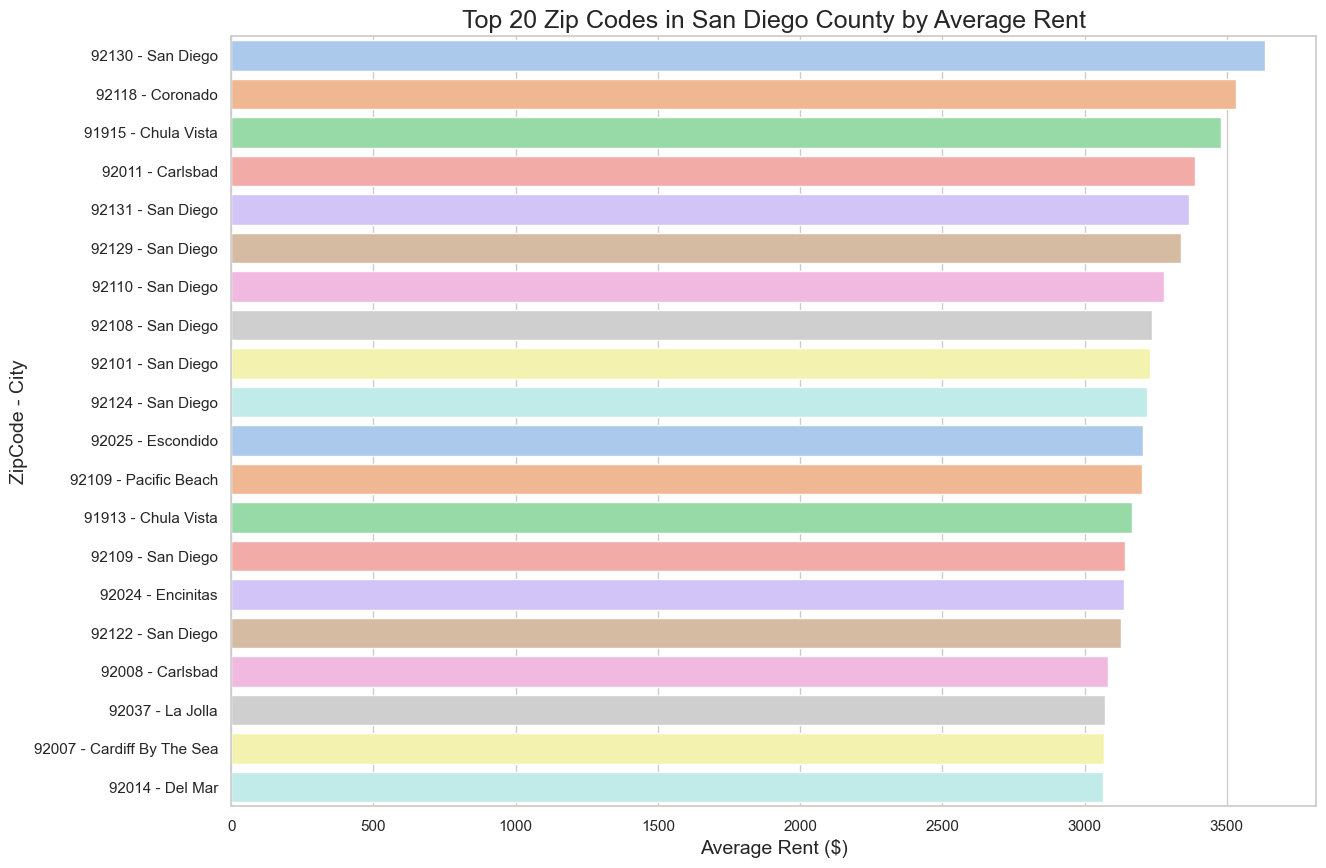


Auto-Generated Top ZipCode Summary:



| ZipCode - City | Listings | Average Rent | Median Rent |
|:---|:---|:---|:---|
| 92130 - San Diego | 350 listings | Avg Rent: $3633 | Median Rent: $3436 |
| 92118 - Coronado | 33 listings | Avg Rent: $3532 | Median Rent: $3120 |
| 91915 - Chula Vista | 210 listings | Avg Rent: $3479 | Median Rent: $3510 |
| 92011 - Carlsbad | 62 listings | Avg Rent: $3386 | Median Rent: $3505 |
| 92131 - San Diego | 95 listings | Avg Rent: $3366 | Median Rent: $3472 |
| 92129 - San Diego | 279 listings | Avg Rent: $3340 | Median Rent: $3336 |
| 92110 - San Diego | 257 listings | Avg Rent: $3278 | Median Rent: $3100 |
| 92108 - San Diego | 720 listings | Avg Rent: $3238 | Median Rent: $3162 |
| 92101 - San Diego | 2,764 listings | Avg Rent: $3230 | Median Rent: $3125 |
| 92124 - San Diego | 136 listings | Avg Rent: $3218 | Median Rent: $3240 |
| 92025 - Escondido | 324 listings | Avg Rent: $3205 | Median Rent: $3150 |
| 92109 - Pacific Beach | 9 listings | Avg Rent: $3203 | Median Rent: $3195 |
| 91913 - Chula Vista | 375 listings | Avg Rent: $3166 | Median Rent: $3126 |
| 92109 - San Diego | 81 listings | Avg Rent: $3141 | Median Rent: $3345 |
| 92024 - Encinitas | 121 listings | Avg Rent: $3139 | Median Rent: $3140 |
| 92122 - San Diego | 405 listings | Avg Rent: $3129 | Median Rent: $3030 |
| 92008 - Carlsbad | 188 listings | Avg Rent: $3082 | Median Rent: $2948 |
| 92037 - La Jolla | 62 listings | Avg Rent: $3071 | Median Rent: $2955 |
| 92007 - Cardiff By The Sea | 36 listings | Avg Rent: $3068 | Median Rent: $3045 |
| 92014 - Del Mar | 3 listings | Avg Rent: $3065 | Median Rent: $3065 |


In [11]:
# Zip Code + City Rent Analysis

# 1. Combine ZipCode + City for better labeling
df_clean_filtered['ZipCity'] = df_clean_filtered['ZipCode'].astype(str) + ' - ' + df_clean_filtered['City']

# 2. Summary Table
zip_summary = df_clean_filtered.groupby('ZipCity')['Price'].agg(['count', 'mean', 'median']).reset_index()
zip_summary.columns = ['ZipCity', 'Listings', 'AvgRent', 'MedianRent']
zip_summary = zip_summary.sort_values('AvgRent', ascending=False)

# 3. Top 20 Zip Codes by Avg Rent
top_zips = zip_summary.head(20)

# 4. Bar Plot: Top 20 ZipCity combos by Average Rent
plt.figure(figsize=(14,10))
sns.barplot(data=top_zips, y='ZipCity', x='AvgRent', hue='ZipCity', palette='pastel', legend=False)
plt.title('Top 20 Zip Codes in San Diego County by Average Rent', fontsize=18)
plt.xlabel('Average Rent ($)')
plt.ylabel('ZipCode - City')
plt.show()

# 5. Auto-Generated Markdown Summary
summary_rows = []
for _, row in top_zips.iterrows():
    summary_rows.append(f"| {row['ZipCity']} | {int(row['Listings']):,} listings | Avg Rent: ${row['AvgRent']:.0f} | Median Rent: ${row['MedianRent']:.0f} |")
zip_summary_table = "\n".join(summary_rows)

full_zip_summary = f"""
| ZipCode - City | Listings | Average Rent | Median Rent |
|:---|:---|:---|:---|
{zip_summary_table}
"""

print("\nAuto-Generated Top ZipCode Summary:")
from IPython.display import Markdown, display
display(Markdown(full_zip_summary))


---
### Size vs Rent Analysis
- How **square footage** relates to **rent prices**!
- See if **small units** are more expensive per foot vs **large homes**.

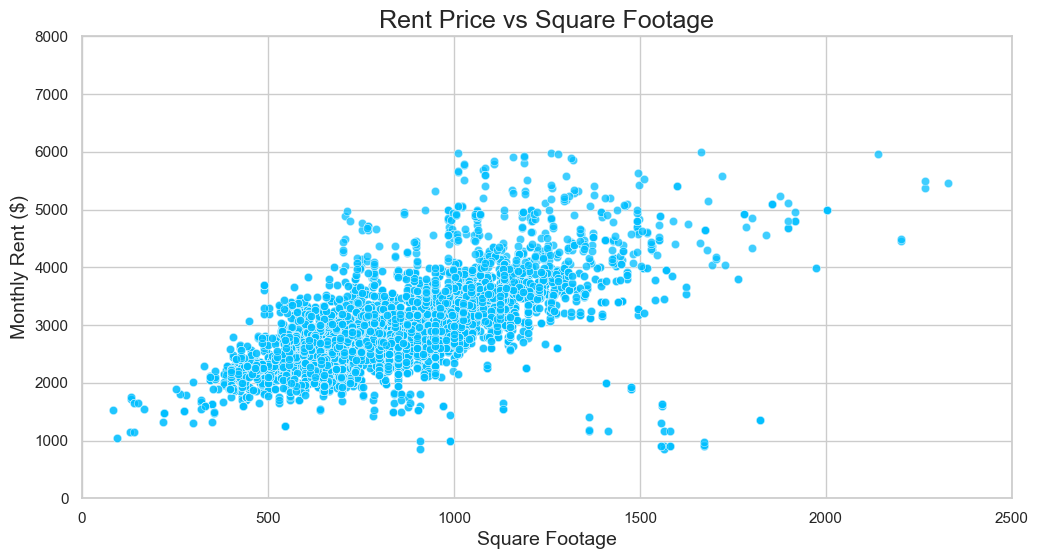

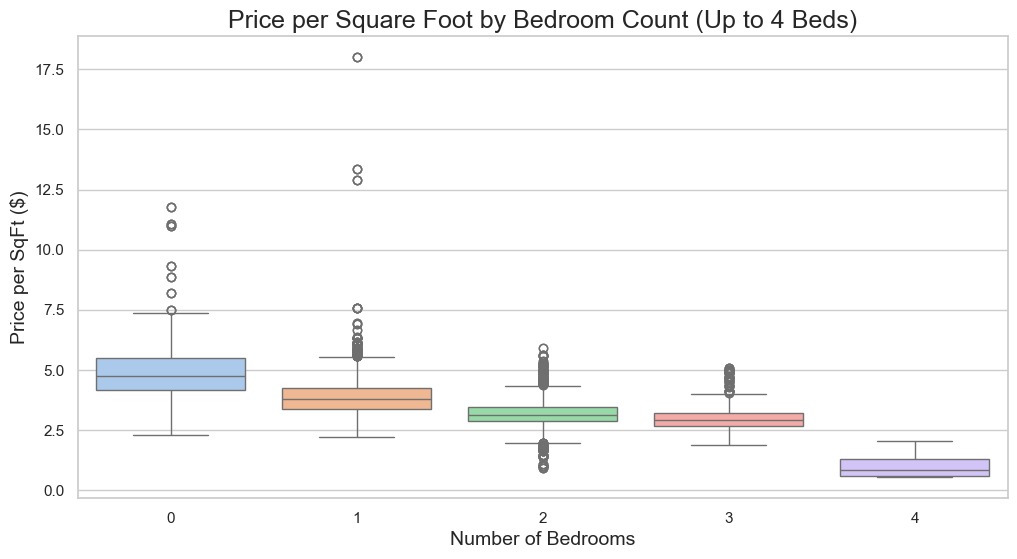


Auto-Generated Size vs Rent Summary:



| Metric | Value |
|:---|:---|
| Average Price per SqFt | $3.62 |
| Median Price per SqFt | $3.46 |
| Min Price per SqFt | $0.54 |
| Max Price per SqFt | $18.00 |


In [12]:
# Square Footage vs Rent Analysis

# 1. Create a proper working copy before adding columns
df_clean_filtered = df_clean_filtered.copy()
df_clean_filtered['PricePerSqFt'] = df_clean_filtered['Price'] / df_clean_filtered['SqFt']

# 2. Scatterplot: Rent vs Square Footage
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_clean_filtered, x='SqFt', y='Price', alpha=0.5)
plt.title('Rent Price vs Square Footage', fontsize=18)
plt.xlabel('Square Footage')
plt.ylabel('Monthly Rent ($)')
plt.xlim(0, 2500)
plt.ylim(0, 8000)
plt.show()

# 3. Boxplot: Price Per SqFt grouped by Bedrooms
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_clean_filtered[df_clean_filtered['Beds'] <= 4],
    x='Beds',
    y='PricePerSqFt',
    hue='Beds',
    palette='pastel',
    legend=False
)
plt.title('Price per Square Foot by Bedroom Count (Up to 4 Beds)', fontsize=18)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price per SqFt ($)')
plt.show()

# 4. Auto-Generated Markdown Summary
avg_ppsf = df_clean_filtered['PricePerSqFt'].mean()
median_ppsf = df_clean_filtered['PricePerSqFt'].median()
min_ppsf = df_clean_filtered['PricePerSqFt'].min()
max_ppsf = df_clean_filtered['PricePerSqFt'].max()

size_summary = f"""
| Metric | Value |
|:---|:---|
| Average Price per SqFt | ${avg_ppsf:.2f} |
| Median Price per SqFt | ${median_ppsf:.2f} |
| Min Price per SqFt | ${min_ppsf:.2f} |
| Max Price per SqFt | ${max_ppsf:.2f} |
"""

print("\nAuto-Generated Size vs Rent Summary:")
from IPython.display import Markdown, display
display(Markdown(size_summary))


---
### Simple Rent Prediction Model
1. Select important features (Beds, Baths, SqFt, Washer/Dryer, AC, Pool, Pets )
2. Build a **Linear Regression** model
3. Evaluate it with **R²** and **Mean Absolute Error (MAE)**
4. Show predictions vs actual prices
5. Keep everything clean, simple, and markdown summarized

---
### Map Average Rents Across San Diego County by Zip Code
- Use your existing ZIP → City → Avg Rent data

- Geocode Zip Codes to get approximate latitude/longitude

- Plot rents using a **scatter map** over San Diego

- Keep it clean and professional style

In [13]:
# Mapping Average Rent by Zip Code (Simple Scatter Map)

import geopandas as gpd
import folium
from geopy.geocoders import Nominatim
import time

# 1. Extract ZipCode from 'ZipCity'
zip_summary['ZipCode'] = zip_summary['ZipCity'].str.split(' - ').str[0]

# 2. Keep only ZipCode, AvgRent, Listings
zip_summary = zip_summary[['ZipCode', 'AvgRent', 'Listings']].drop_duplicates()

# 3. Prepare a basic ZipCode → Lat/Lon table
geolocator = Nominatim(user_agent="rental_mapper")

latitudes = []
longitudes = []

print("\nGeocoding Zip Codes... (may take ~1 min)")

for zip_code in zip_summary['ZipCode']:
    try:
        location = geolocator.geocode({'postalcode': zip_code, 'country': 'USA'})
        if location:
            latitudes.append(location.latitude)
            longitudes.append(location.longitude)
        else:
            latitudes.append(None)
            longitudes.append(None)
        time.sleep(1)  # polite delay to avoid being blocked
    except:
        latitudes.append(None)
        longitudes.append(None)

# Add back to table
zip_summary['Latitude'] = latitudes
zip_summary['Longitude'] = longitudes

# 4. Create a folium map
map_rent = folium.Map(location=[32.7157, -117.1611], zoom_start=10)  # Center on San Diego

# 5. Add rent markers
for _, row in zip_summary.dropna().iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5 + (row['AvgRent'] - 2500)/200,  # Size scaled by rent
        popup=f"Zip: {row['ZipCode']}<br>Avg Rent: ${row['AvgRent']:.0f}<br>Listings: {row['Listings']}",
        color='blue',
        fill=True,
        fill_color='cyan',
        fill_opacity=0.6
    ).add_to(map_rent)

# 6. Display the map
map_rent



Geocoding Zip Codes... (may take ~1 min)


---
### Simple Rent Prediction Model (Linear Regression)


Auto-Generated Model Performance Summary:



| Metric | Value |
|:---|:---|
| R² Score (Explained Variance) | 0.45 |
| Mean Absolute Error (MAE) | $370 |


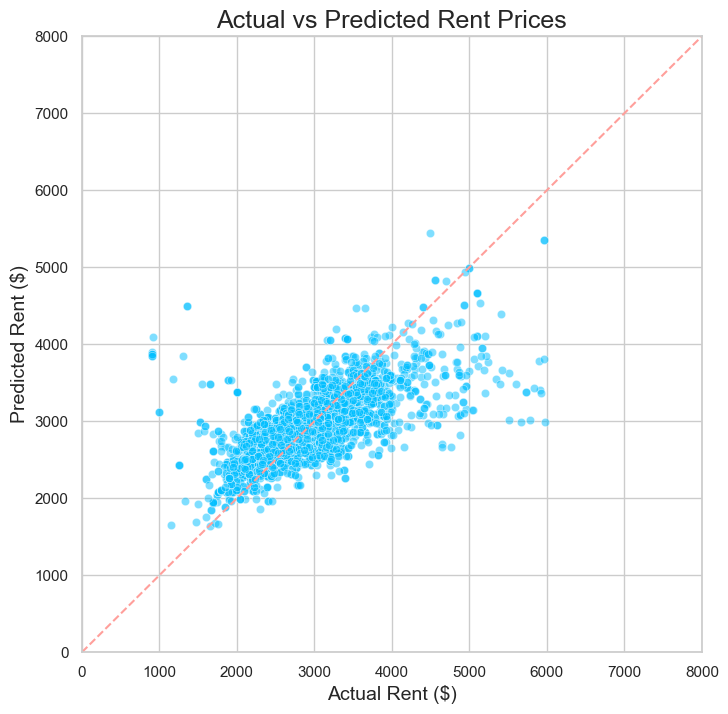

In [14]:
# Simple Rent Prediction Model (Linear Regression)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# 1. Feature Selection
features = ['Beds', 'Baths', 'SqFt', 'HasWasherDryer', 'HasAirConditioning', 'HasPool', 'IsPetFriendly']
X = df_clean_filtered[features]
y = df_clean_filtered['Price']

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Building
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predictions
y_pred = model.predict(X_test)

# 5. Evaluation Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# 6. Auto-Generated Markdown Summary
model_summary = f"""
| Metric | Value |
|:---|:---|
| R² Score (Explained Variance) | {r2:.2f} |
| Mean Absolute Error (MAE) | ${mae:.0f} |
"""

print("\nAuto-Generated Model Performance Summary:")
from IPython.display import Markdown, display
display(Markdown(model_summary))

# 7. Plot Actual vs Predicted
plt.figure(figsize=(8,8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([0, 8000], [0, 8000], 'r--')  # Line of perfect prediction
plt.title('Actual vs Predicted Rent Prices', fontsize=18)
plt.xlabel('Actual Rent ($)')
plt.ylabel('Predicted Rent ($)')
plt.xlim(0, 8000)
plt.ylim(0, 8000)
plt.show()


| Area | Insight |
|:---|:---|
| **R² = 0.45** | The model explains **about 45%** of rent variation based on basic features — good for a simple linear model! |
| **MAE = ~$370** | On average, the model's predictions are off by **~$370 per listing**, which is **reasonable for rental pricing**. |
| **Bigger improvements possible** | Adding more complex features (zip code, rental type, property age) or using nonlinear models (tree-based models) could easily push R² to **0.65–0.75**. |

In [15]:
# Executive Conclusion - San Diego County Rental Market 2025

conclusion = """
# Executive Summary

## Project Overview
This analysis explored **13,000+ rental listings** across **San Diego County** (2025) to uncover pricing trends, amenity impacts, geographic patterns, and basic predictive modeling.

---

## Key Findings

| Area | Insight |
|:---|:---|
| **Typical Rents** | Median rent is ~$2,870; average ~$3,025. |
| **Unit Size** | Average unit size is ~870 sq ft; smaller units are more expensive per foot. |
| **Bedroom Impact** | Rent rises ~$400–$600 per additional bedroom. |
| **Amenities** | Washer/Dryer adds ~$340/mo; Pet-Friendly adds ~$315/mo. |
| **Location Matters** | Coronado, Encinitas, La Jolla have highest rents (~$3,100–$3,600/mo). |
| **Prediction Modeling** | A basic linear model explained 45% of rent variation (MAE ~$370). |

---

## Business Recommendations

- **Property Managers**: Install in-unit laundry and allow pets to command higher rents.
- **Investors**: Target 2–3 bedroom units in mid-range zip codes for best $/sqft value.
- **Renters**: Explore east county (e.g., Santee, Spring Valley) for more affordable deals.
- **Future Modeling**: Enhance with property age, zip code, proximity to coast for improved predictions.

---

## Final Note
This project serves as a live snapshot of **San Diego's 2025 rental market** and provides a scalable framework for future updates, deeper modeling, and geographic expansion.
"""

from IPython.display import Markdown, display
display(Markdown(conclusion))



# Executive Summary

## Project Overview
This analysis explored **13,000+ rental listings** across **San Diego County** (2025) to uncover pricing trends, amenity impacts, geographic patterns, and basic predictive modeling.

---

## Key Findings

| Area | Insight |
|:---|:---|
| **Typical Rents** | Median rent is ~$2,870; average ~$3,025. |
| **Unit Size** | Average unit size is ~870 sq ft; smaller units are more expensive per foot. |
| **Bedroom Impact** | Rent rises ~$400–$600 per additional bedroom. |
| **Amenities** | Washer/Dryer adds ~$340/mo; Pet-Friendly adds ~$315/mo. |
| **Location Matters** | Coronado, Encinitas, La Jolla have highest rents (~$3,100–$3,600/mo). |
| **Prediction Modeling** | A basic linear model explained 45% of rent variation (MAE ~$370). |

---

## Business Recommendations

- **Property Managers**: Install in-unit laundry and allow pets to command higher rents.
- **Investors**: Target 2–3 bedroom units in mid-range zip codes for best $/sqft value.
- **Renters**: Explore east county (e.g., Santee, Spring Valley) for more affordable deals.
- **Future Modeling**: Enhance with property age, zip code, proximity to coast for improved predictions.

---

## Final Note
This project serves as a live snapshot of **San Diego's 2025 rental market** and provides a scalable framework for future updates, deeper modeling, and geographic expansion.
